In [1]:
### The Spark Foundation : Data Science & Business analytics intern (GRIP)
### Task 2 : 6# Prediction using  Decision Tree Algorithm
### GRIPSEPT23
### done by Nada Mossad Mohamed Ahmed Abodegham

In [2]:
!pip install pydotplus
!pip install graphviz

In [3]:
# Uploading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay ,precision_score, recall_score, f1_score
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [4]:
# Get the data
i=datasets.load_iris()
X=pd.DataFrame(i.data, columns=i.feature_names)
y=i.target


In [5]:
# Get a sample of the data
X.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
29,4.7,3.2,1.6,0.2
10,5.4,3.7,1.5,0.2
16,5.4,3.9,1.3,0.4
121,5.6,2.8,4.9,2.0
95,5.7,3.0,4.2,1.2


In [6]:
# knowing the Target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Exploring the data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
### dataframe shape -> 150 rows , 4 columns
X.shape

(150, 4)

In [9]:
### Data cleaning

In [10]:
# Check for missing data
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
#  Separate the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1)

In [13]:
# Preparing DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
# Accuracy and predicting
dt_predictions=dt.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, dt_predictions),'%'))

Accuracy score:  95.555556%


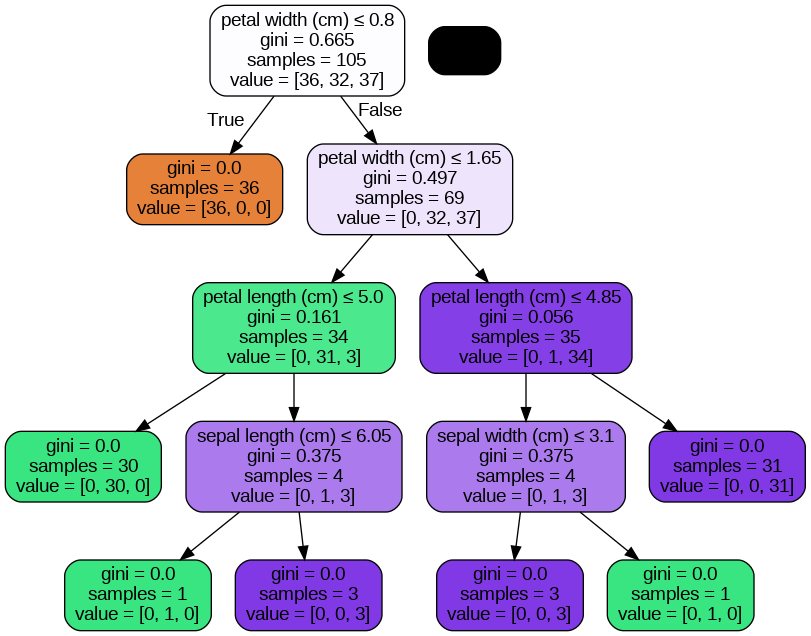

In [15]:
# Drawing graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=i.feature_names,  filled=True, rounded=True,special_characters=True)
g= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(g.create_png())

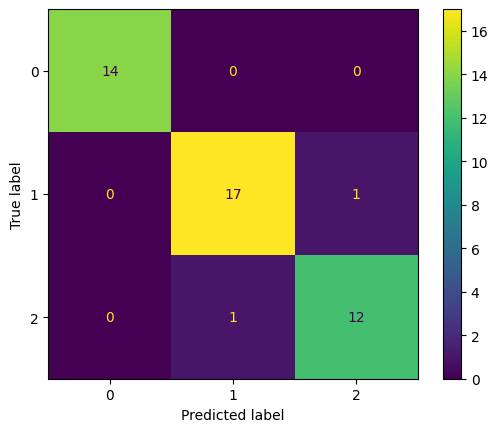

In [17]:
# Drawing the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)
plt.show()